In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/abdullahsalihozguven/Desktop/Python/Projects/Airbnb/boston.csv"

boston_airbnb_data_frame = pd.read_csv(file_path)

boston_airbnb_data_frame.head()

,id,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3781.0,Rental unit in Boston · ★4.96 · 1 bedroom · 1 ...,East Boston,42.36413,-71.02991,Entire home/apt,125.0,29,24,0.23,1,271,0
1,5506.0,Guest suite in Boston · ★4.79 · 1 bedroom · 1 ...,Roxbury,42.32844,-71.09581,Entire home/apt,135.0,3,122,0.68,10,87,4
2,6695.0,Condo in Boston · ★4.81 · Studio · 2 beds · 1 ...,Roxbury,42.32802,-71.09387,Entire home/apt,179.0,3,127,0.73,10,107,4
3,8789.0,Rental unit in Boston · ★4.67 · 1 bedroom · 1 ...,Beacon Hill,42.35867,-71.06307,Entire home/apt,91.0,91,27,0.24,9,237,2
4,10813.0,Rental unit in Boston · ★5.0 · Studio · 1 bed ...,Back Bay,42.35061,-71.08787,Entire home/apt,86.0,32,5,0.09,11,365,1


In [3]:
boston_airbnb_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4204 non-null   float64
 1   name                            4204 non-null   object 
 2   neighbourhood                   4204 non-null   object 
 3   latitude                        4204 non-null   float64
 4   longitude                       4204 non-null   float64
 5   room_type                       4204 non-null   object 
 6   price                           3854 non-null   float64
 7   minimum_nights                  4204 non-null   int64  
 8   number_of_reviews               4204 non-null   int64  
 9   reviews_per_month               3086 non-null   float64
 10  calculated_host_listings_count  4204 non-null   int64  
 11  availability_365                4204 non-null   int64  
 12  number_of_reviews_ltm           42

In [4]:
boston_airbnb_data_frame = boston_airbnb_data_frame.dropna()

In [6]:
price_location_analysis = boston_airbnb_data_frame[['price', 'neighbourhood', 'number_of_reviews']]
price_location_analysis

,price,neighbourhood,number_of_reviews
0,125.0,East Boston,24
1,135.0,Roxbury,122
2,179.0,Roxbury,127
3,91.0,Beacon Hill,27
4,86.0,Back Bay,5
...,...,...,...
4148,109.0,Back Bay,1
4156,110.0,North End,1
4163,140.0,East Boston,1
4164,144.0,Roxbury,2


Text(0, 0.5, 'The Number of Reviews')

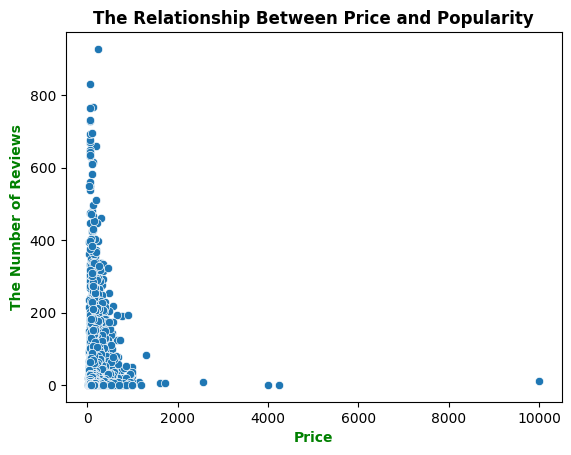

In [7]:
sns.scatterplot(x='price', y='number_of_reviews', data=price_location_analysis)
plt.title('The Relationship Between Price and Popularity', color='black',fontweight ='bold')
plt.xlabel('Price', color='green', fontweight ='black')
plt.ylabel('The Number of Reviews', color ='green', fontweight ='bold')


/var/folders/w_/l8px7cb545b5j_6v10d29nzh0000gn/T/ipykernel_96007/1781704841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood', y='price', data=mean_prices, palette='viridis')


Text(0, 0.5, 'Mean Price')

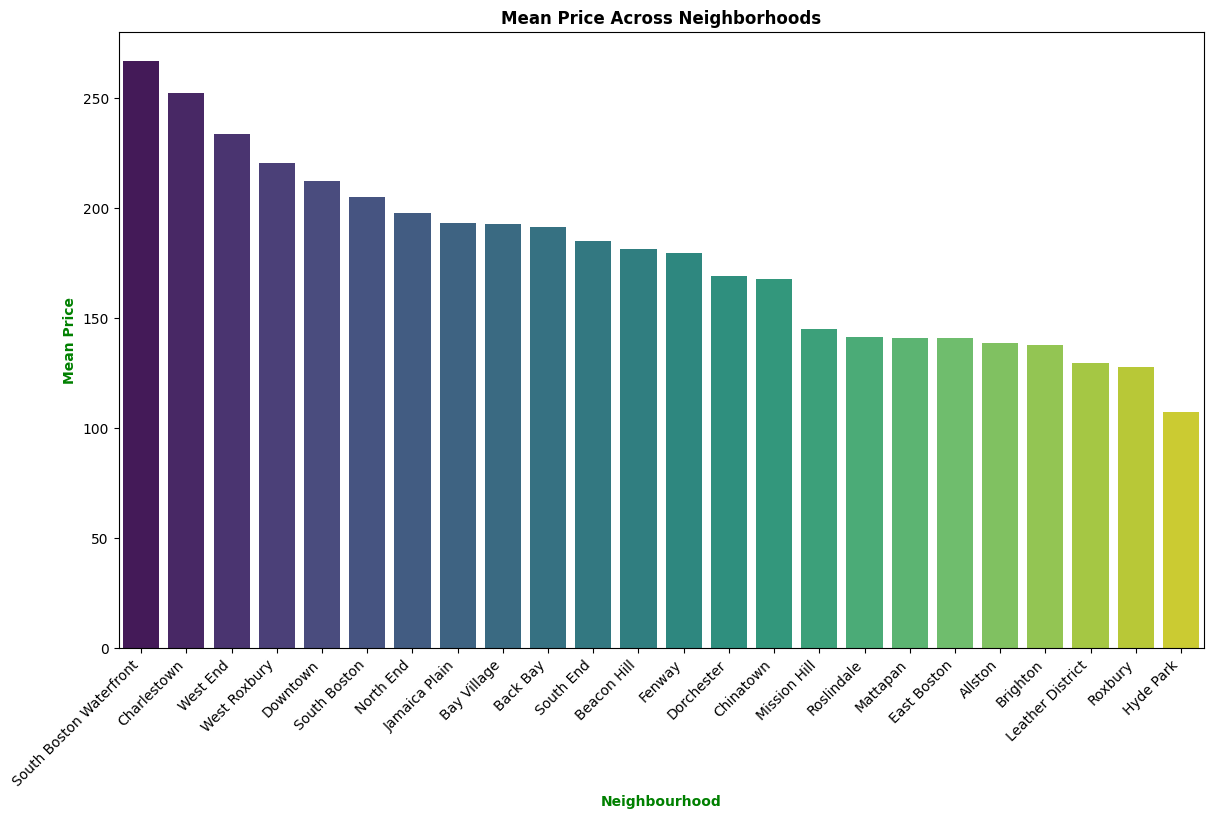

In [8]:
mean_prices = boston_airbnb_data_frame.groupby('neighbourhood')['price'].mean().reset_index()
mean_prices = mean_prices.sort_values(by='price', ascending = False)
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood', y='price', data=mean_prices, palette='viridis')
plt.xticks(rotation=45, ha='right') 
plt.title('Mean Price Across Neighbourhoods', color='black', fontweight ='bold')
plt.xlabel('Neighbourhood',color='green',fontweight ='bold')
plt.ylabel('Mean Price',color='green',fontweight ='bold')

/var/folders/w_/l8px7cb545b5j_6v10d29nzh0000gn/T/ipykernel_96007/1567442748.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_airbnb_data_frame['price'], kde=True, color='purple')


Text(0, 0.5, 'Frequency')

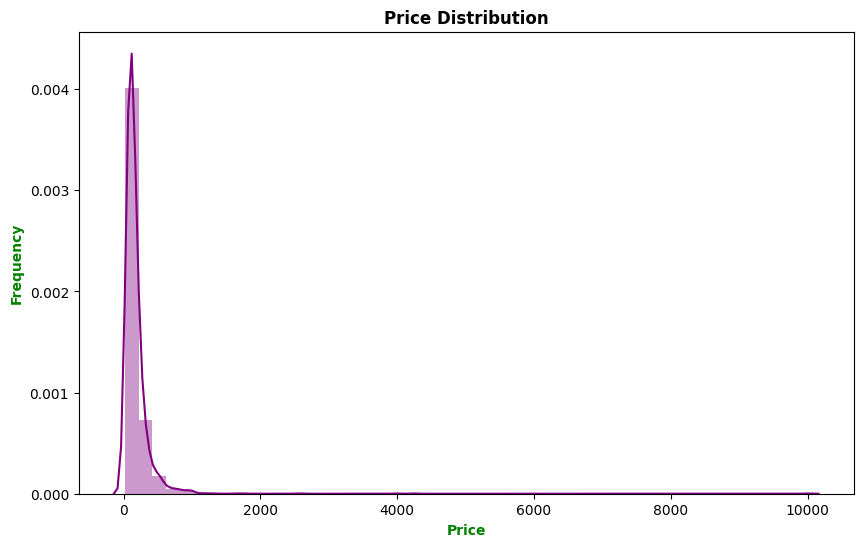

In [9]:
plt.figure(figsize=(10, 6))
sns.distplot(boston_airbnb_data_frame['price'], kde=True, color='purple')
plt.title('Price Distribution', color='black', fontweight='bold')
plt.xlabel('Price', color='green', fontweight='bold')
plt.ylabel('Frequency', color='green', fontweight='bold')

In [11]:
neighbourhood_reviews = boston_airbnb_data_frame.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
neighbourhood_reviews = neighbourhood_reviews.sort_values(by='number_of_reviews', ascending=False)

# The Most Popular Neighbourhoods with the Base of Reviews
top_neighbourhoods = neighbourhood_reviews.head(10)
top_neighbourhoods

,neighbourhood,number_of_reviews
7,Dorchester,21243
8,Downtown,20124
9,East Boston,18223
21,South End,16343
12,Jamaica Plain,13532
18,Roxbury,12735
19,South Boston,9807
1,Back Bay,9595
3,Beacon Hill,8321
4,Brighton,6713


/var/folders/w_/l8px7cb545b5j_6v10d29nzh0000gn/T/ipykernel_96007/2363984694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_reviews', y='neighbourhood', data=top_neighbourhoods, palette='viridis')


Text(0, 0.5, 'Neighbourhoods')

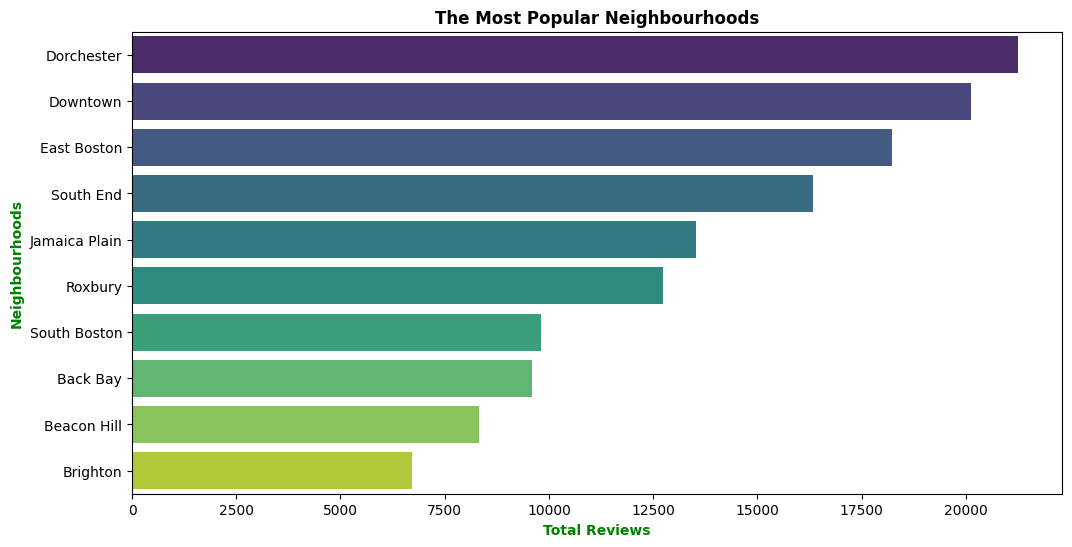

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_reviews', y='neighbourhood', data=top_neighbourhoods, palette='viridis')
plt.title('The Most Popular Neighbourhoods',color='black',fontweight ='bold')
plt.xlabel('Total Reviews',color='green',fontweight ='bold')
plt.ylabel('Neighbourhoods',color='green',fontweight ='bold')

Text(0, 0.5, 'Frequency')

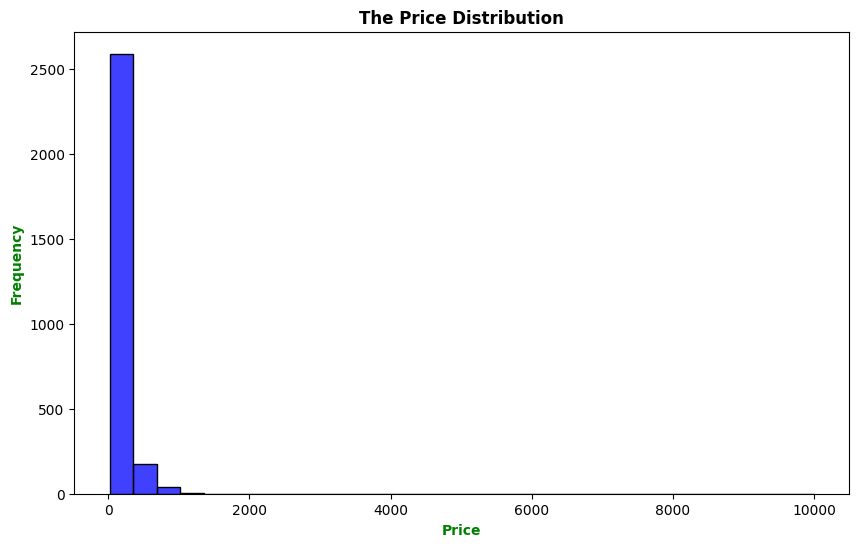

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_airbnb_data_frame['price'], bins=30, kde=False, color='blue', legend = True)
plt.title('The Price Distribution', color='black',fontweight ='bold')
plt.xlabel('Price', color='green',fontweight ='bold')
plt.ylabel('Frequency', color='green',fontweight ='bold')

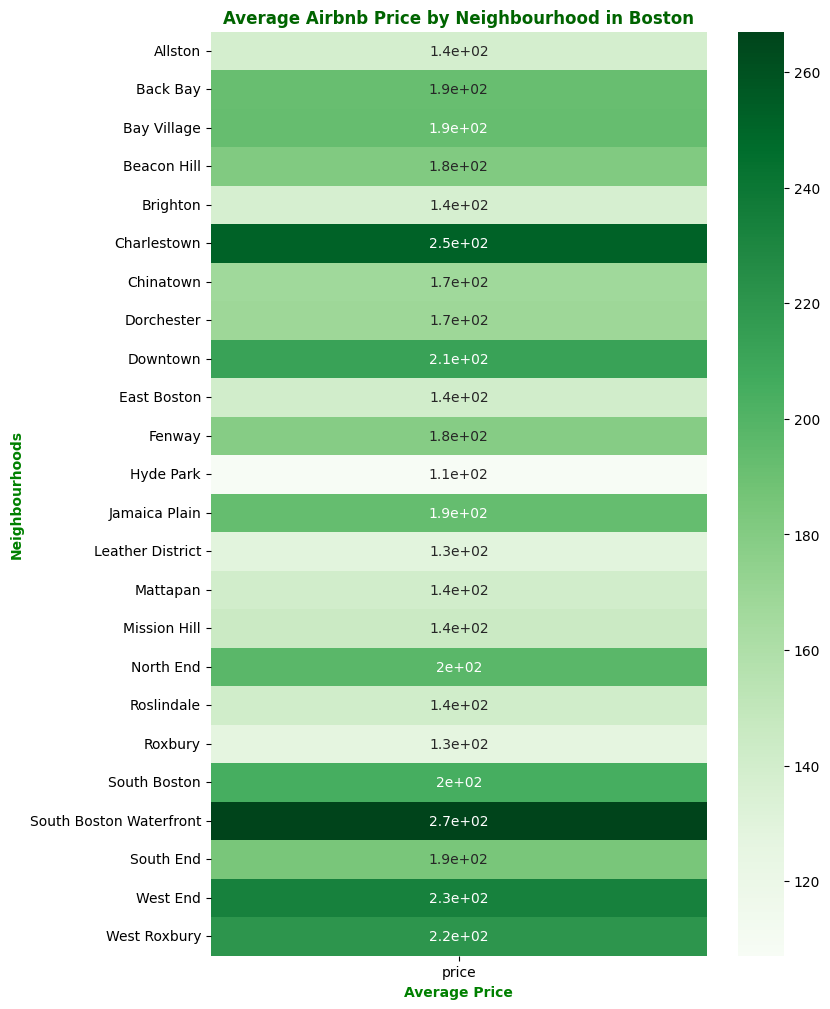

In [31]:
price_map = boston_airbnb_data_frame.groupby('neighbourhood')['price'].mean().reset_index()
heatmap_data = price_map.set_index('neighbourhood')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, cmap='Greens', annot=True)
plt.xlabel('Average Price', color='green', fontweight='bold')
plt.ylabel('Neighbourhoods', color='green', fontweight='bold')
plt.title('Average Airbnb Price by Neighbourhood in Boston', color='darkgreen', fontweight='bold')
plt.show()



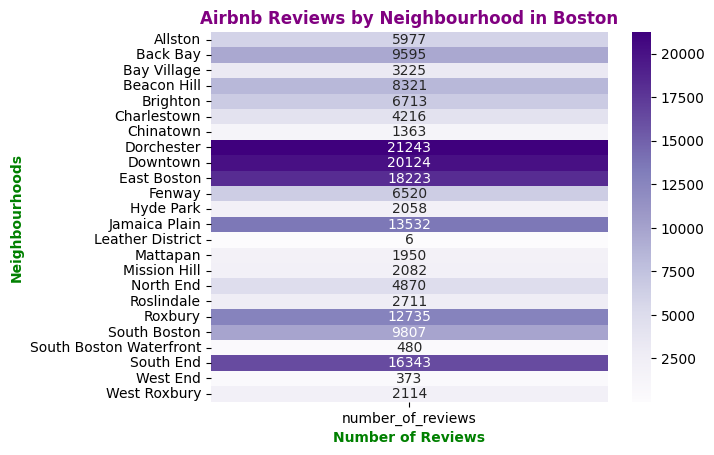

In [23]:
number_of_reviews_map = boston_airbnb_data_frame.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
heatmap_data = number_of_reviews_map.set_index('neighbourhood')
plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data[['number_of_reviews']], cmap='Purples', annot=True, fmt="d")
plt.xlabel('Number of Reviews', color='green', fontweight='bold')
plt.ylabel('Neighbourhoods', color='green', fontweight='bold')
plt.title('Airbnb Reviews by Neighbourhood in Boston', color='purple', fontweight='bold')
plt.show()

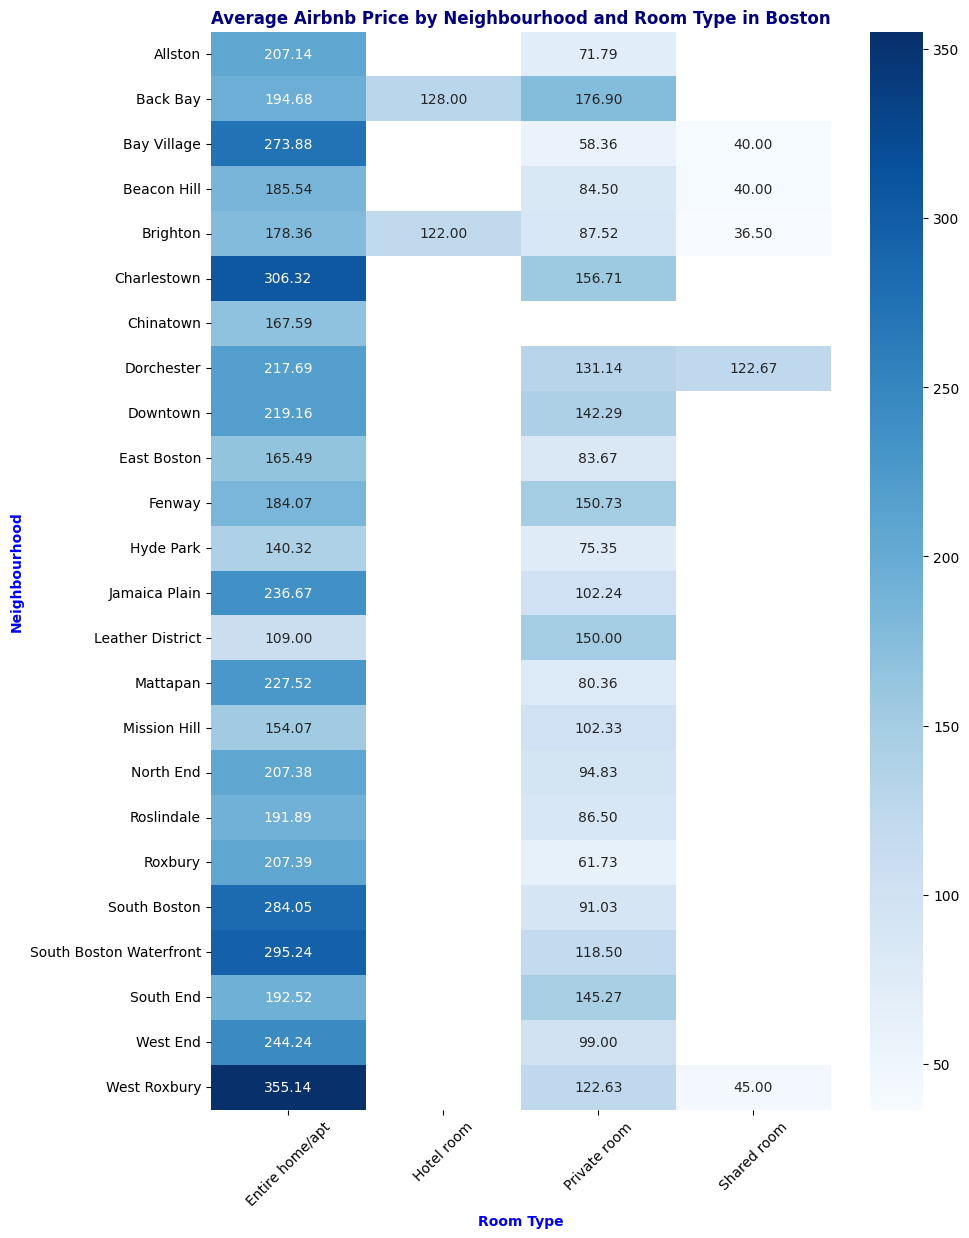

In [30]:
price_location_analysis = boston_airbnb_data_frame[['price', 'neighbourhood', 'room_type']]
heatmap_data = price_location_analysis.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')
plt.figure(figsize=(10, 14))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".2f")
plt.xlabel('Room Type', color='blue', fontweight='bold')
plt.ylabel('Neighbourhood', color='blue', fontweight='bold')
plt.title('Average Airbnb Price by Neighbourhood and Room Type in Boston', color='navy', fontweight='bold')
plt.xticks(rotation=45) 
plt.show()
